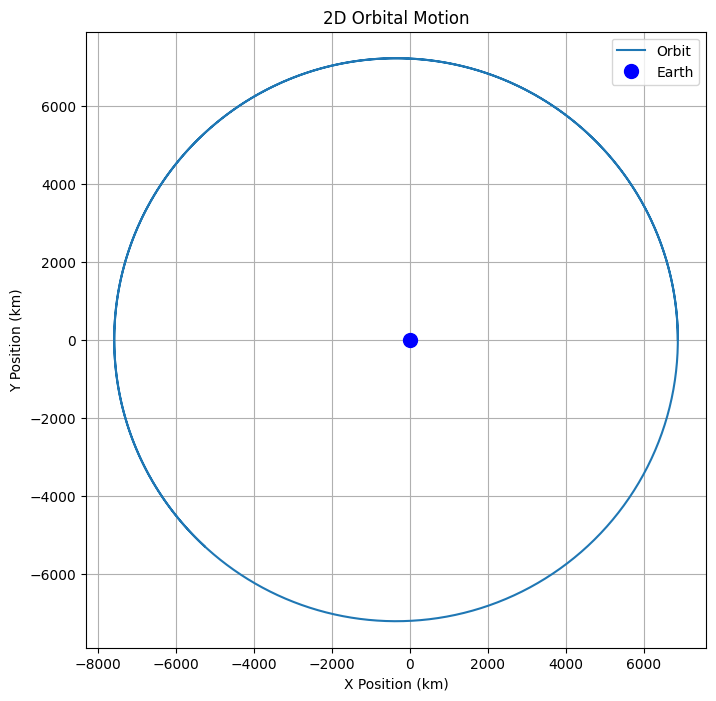

In [65]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)

# Initial state vector
X0 = [x0, y0, vx0, vy0]

# Time span
T = 10000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)

# Define the orbital dynamics
def orbital_dynamics(t, X):
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)  # Distance from the center of the Earth
    ax = -G * M * x / r**3    # Acceleration in x
    ay = -G * M * y / r**3    # Acceleration in y
    return [vx, vy, ax, ay]

# Solve the orbital dynamics
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract the results
x, y = sol.y[0], sol.y[1]

# Visualization
plt.figure(figsize=(8, 8))
plt.plot(x / 1e3, y / 1e3, label="Orbit")  # Convert to kilometers for better visualization
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)  # Earth's center
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("2D Orbital Motion")
plt.legend()
plt.grid()
plt.axis('equal')  # Equal scaling for x and y axes
plt.show()


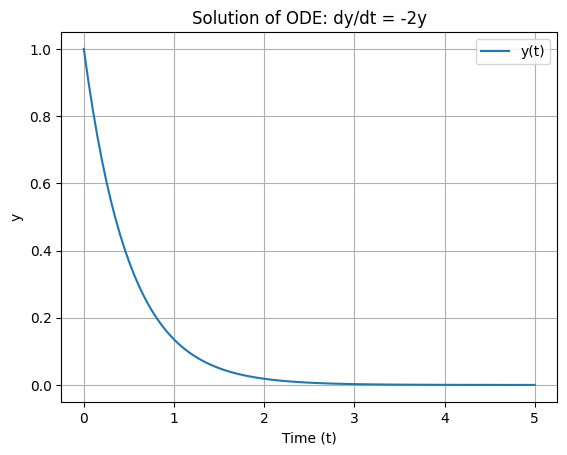

In [66]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define ODE function
def linear_ode(t, y):
    return -2 * y

# Initial condition
y0 = [1.0]
t_span = (0, 5)  # Time range
t_eval = np.linspace(0, 5, 100)  # Time points to evaluate

# Solve ODE
sol = solve_ivp(linear_ode, t_span, y0, t_eval=t_eval)

# Plot solution
plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("Time (t)")
plt.ylabel("y")
plt.title("Solution of ODE: dy/dt = -2y")
plt.legend()
plt.grid()
plt.show()


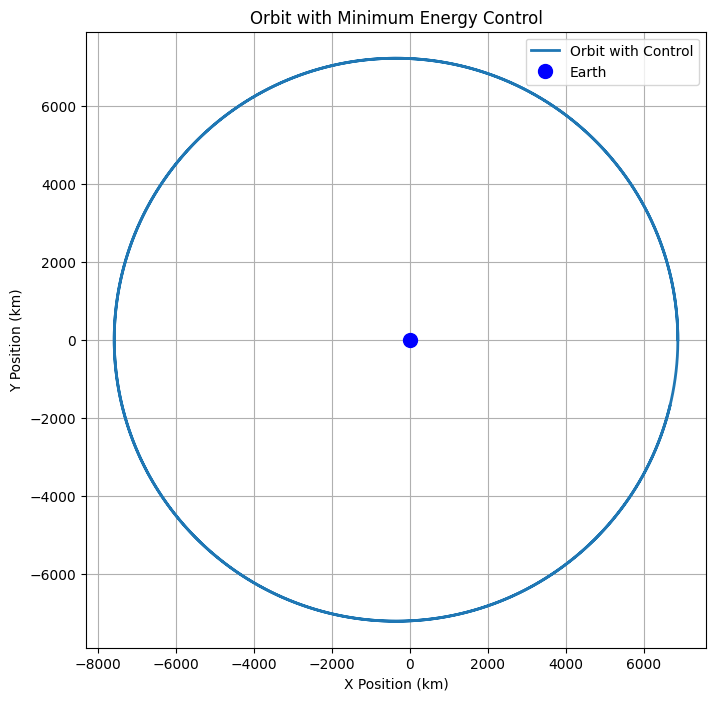

In [67]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)

# Target circular orbit radius
r_target = r0
v_target = np.sqrt(G * M / r_target)  # Circular orbit speed

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function
def control_input(t, X):
    """
    Compute the control input to maintain minimum energy orbit.

    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].

    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    # Desired acceleration for circular orbit
    ax_desired = -G * M * x / r**3
    ay_desired = -G * M * y / r**3

    # Current acceleration without control
    ax_current = -G * M * x / r**3
    ay_current = -G * M * y / r**3

    # Control input (difference between desired and current acceleration)
    ux = ax_desired - ax_current
    uy = ay_desired - ay_current
    return np.array([ux, uy])

# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.

    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].

    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 12000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]

# Plot orbit
plt.figure(figsize=(8, 8))
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


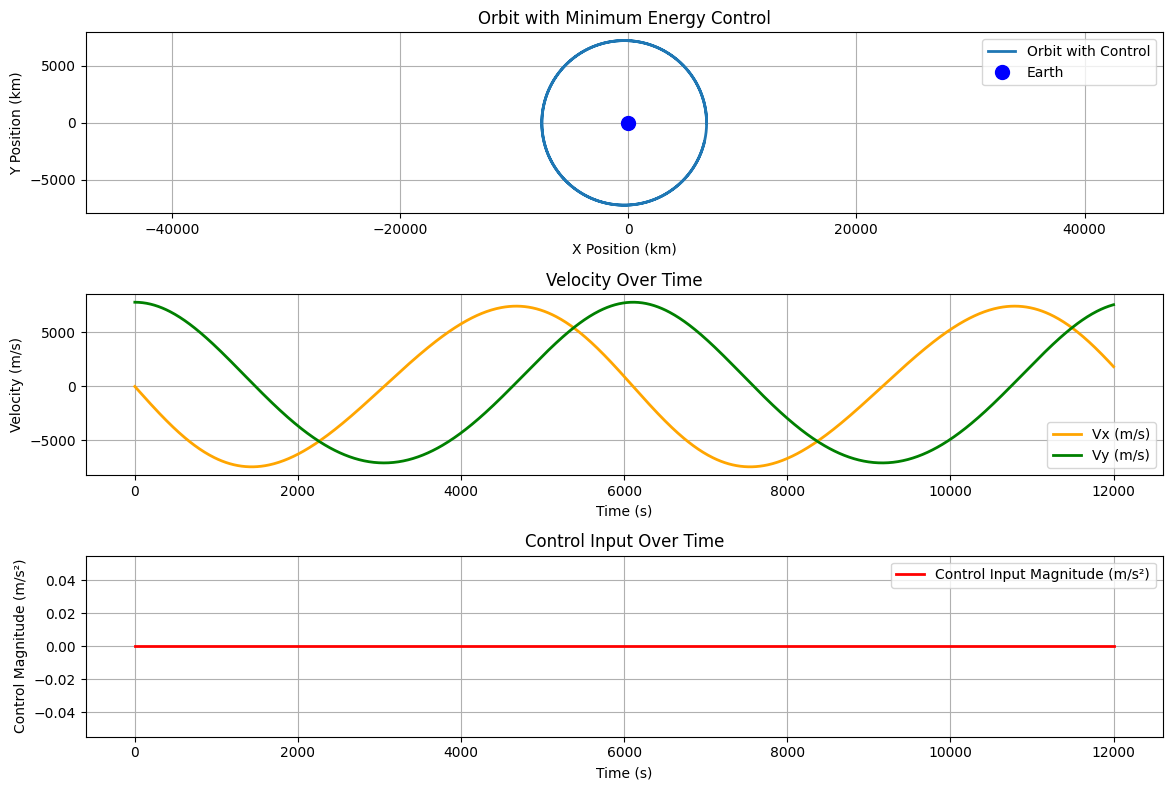

In [68]:
# Extract velocity and control input over time
vx, vy = sol.y[2], sol.y[3]  # Velocities
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])

# Compute control input magnitude
control_magnitudes = np.linalg.norm(control_inputs, axis=1)

# Plot orbit
plt.figure(figsize=(12, 8))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Input Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


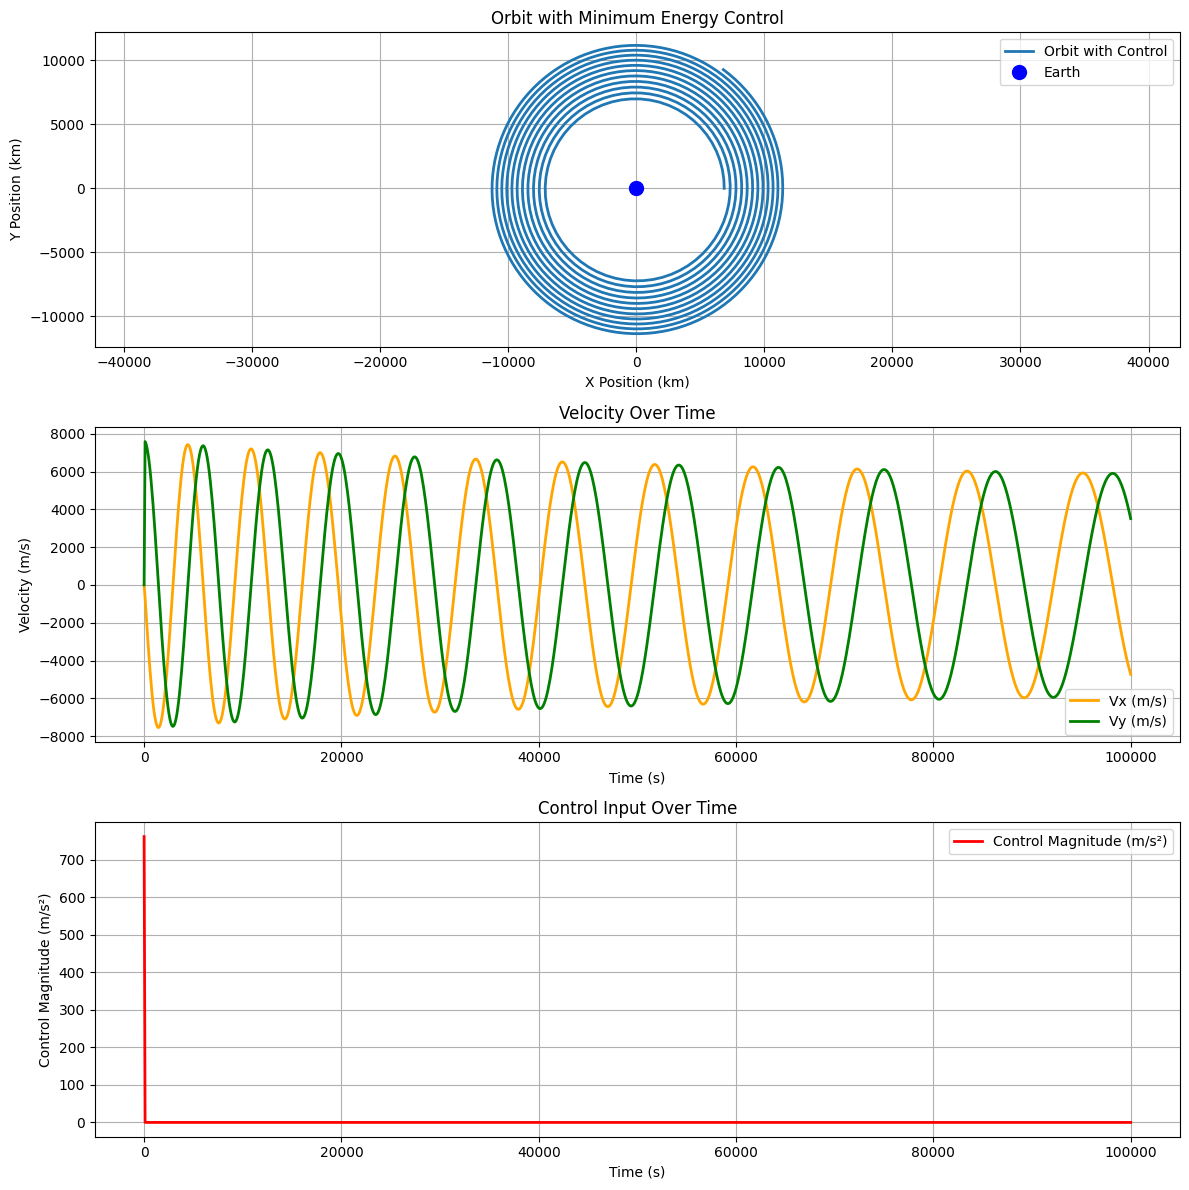

In [69]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, 0 # Initial velocity (perpendicular to position)

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function
def control_input(t, X):
    """
    Compute the control input with gravitational compensation and velocity control.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Desired circular velocity
    v_circular = np.sqrt(G * M / r)
    vx_desired = -v_circular * (y / r)
    vy_desired = v_circular * (x / r)

    # Proportional control for velocity
    k_v = 0.1  # Velocity control gain
    ux_velocity = k_v * (vx_desired - vx)
    uy_velocity = k_v * (vy_desired - vy)
    
    # Gravitational control
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3

    # Total control input
    ux = ux_velocity - ax_gravity
    uy = uy_velocity - ay_gravity
    return np.array([ux, uy])

# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 100000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs, axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


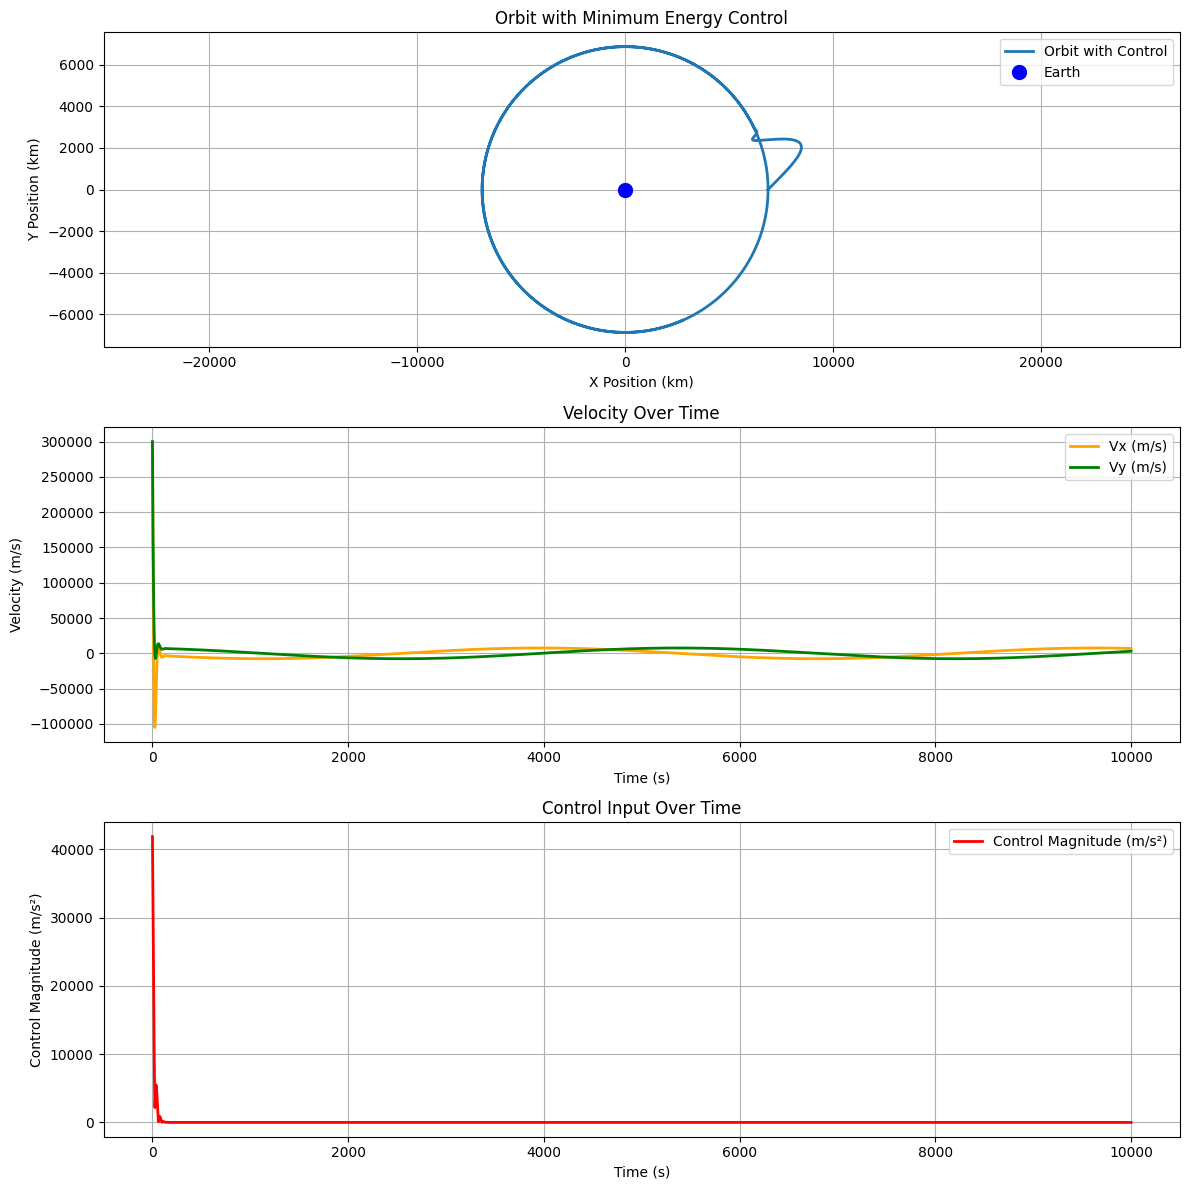

In [70]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 300e3, 300e3 # Initial velocity (perpendicular to position)

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function with position and velocity control
def control_input(t, X):
    """
    Compute the control input with position and velocity correction.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Target orbit parameters
    r_target = R + 500e3  # Target altitude (500 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Control gains
    k_p = 0.01  # Position control gain
    k_v = 0.1   # Velocity control gain
    
    # Position control
    ux_position = k_p * (r_target - r) * (x / r)
    uy_position = k_p * (r_target - r) * (y / r)
    
    # Velocity control
    ux_velocity = k_v * (vx_desired - vx)
    uy_velocity = k_v * (vy_desired - vy)
    
    # Gravitational compensation
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Total control input
    ux = ux_position + ux_velocity - ax_gravity
    uy = uy_position + uy_velocity - ay_gravity
    return np.array([ux, uy])


# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 10000  # Simulation time in seconds
t_eval = np.linspace(0, T, 10000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs, axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


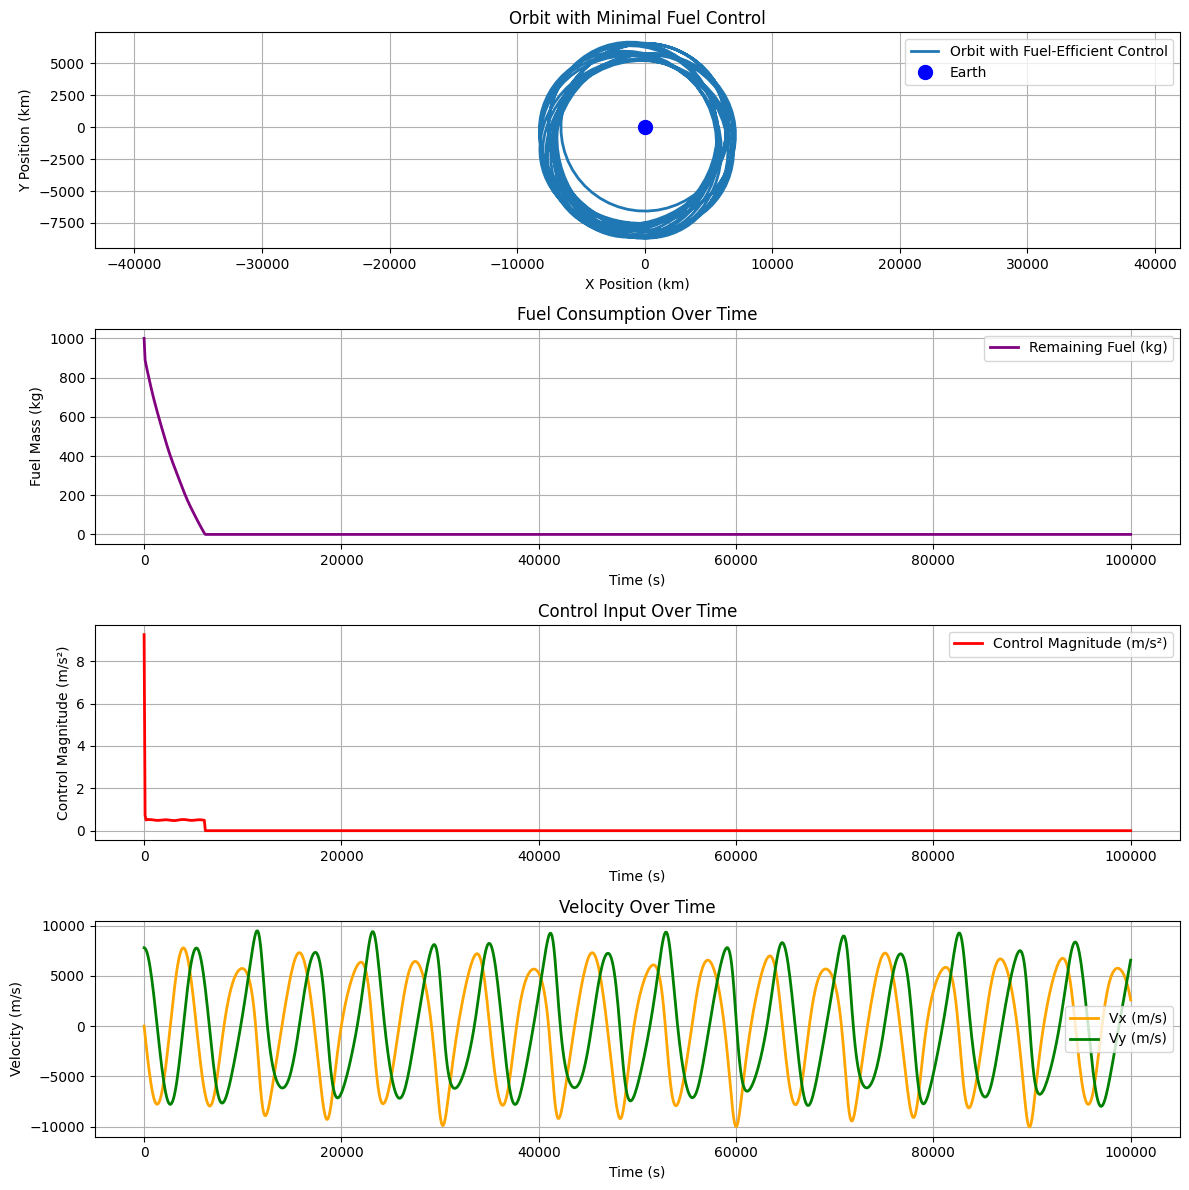

In [80]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 1000     # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# Initial conditions
r0 = R + 200e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]

# PID Control Parameters
k_p = 0.005   # Position control gain (smaller for smooth control)
k_v = 0.05    # Velocity control gain
deadband = 0.1 # Threshold to stop fuel usage if error is small

# Define control input function with fuel efficiency
def control_input(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # Target orbit parameters
    r_target = R + 200e3  # Target altitude (500 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Compute position and velocity error
    pos_error = r_target - r
    vel_error_x = vx_desired - vx
    vel_error_y = vy_desired - vy
    
    # PID-based minimal fuel control
    ux_position = k_p * pos_error * (x / r)
    uy_position = k_p * pos_error * (y / r)
    
    ux_velocity = k_v * vel_error_x
    uy_velocity = k_v * vel_error_y
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Total control input
    ux = ux_position + ux_velocity - ax_gravity
    uy = uy_position + uy_velocity - ay_gravity

    # Compute thrust force
    m_total = m_dry + mf
    thrust_x = m_total * ux
    thrust_y = m_total * uy
    thrust_magnitude = np.sqrt(thrust_x**2 + thrust_y**2)
    
    # Fuel efficiency control: If error is small, avoid burning fuel
    if np.abs(pos_error) < deadband and np.abs(vel_error_x) < deadband and np.abs(vel_error_y) < deadband:
        thrust_magnitude = 0  # Stop using fuel in deadband range

    # Fuel consumption (apply only if fuel is available)
    if thrust_magnitude > 0 and mf > 0:
        dm_dt = -thrust_magnitude / v_exhaust  # Fuel burn rate
    else:
        dm_dt = 0  # No fuel consumption if no thrust or no fuel left

    # If fuel is depleted, disable thrust
    if mf <= 0:
        ux, uy, dm_dt = 0, 0, 0

    return np.array([ux, uy, dm_dt])

# Define orbital dynamics with fuel mass variation
def orbital_dynamics(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy, dm_dt = control_input(t, X)
    
    # Disturbance (random and periodic)
    # random_disturabance = 50e-4 * np.random.randn(2)  # Smaller disturbances
    periodic_disturbance = 50e-2 * np.array([np.sin(2 * np.pi * t / 10000), np.cos(2 * np.pi * t / 10000)])
    disturbance = periodic_disturbance
    
    # Total acceleration
    ax = ax_gravity + ux + disturbance[0]
    ay = ay_gravity + uy + disturbance[1]
    
    return [vx, vy, ax, ay, dm_dt]

# Solve the dynamics
T = 100000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. Orbit plot
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Fuel-Efficient Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimal Fuel Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. Fuel consumption plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3. Control input plot
plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4. Velocity plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## 질량

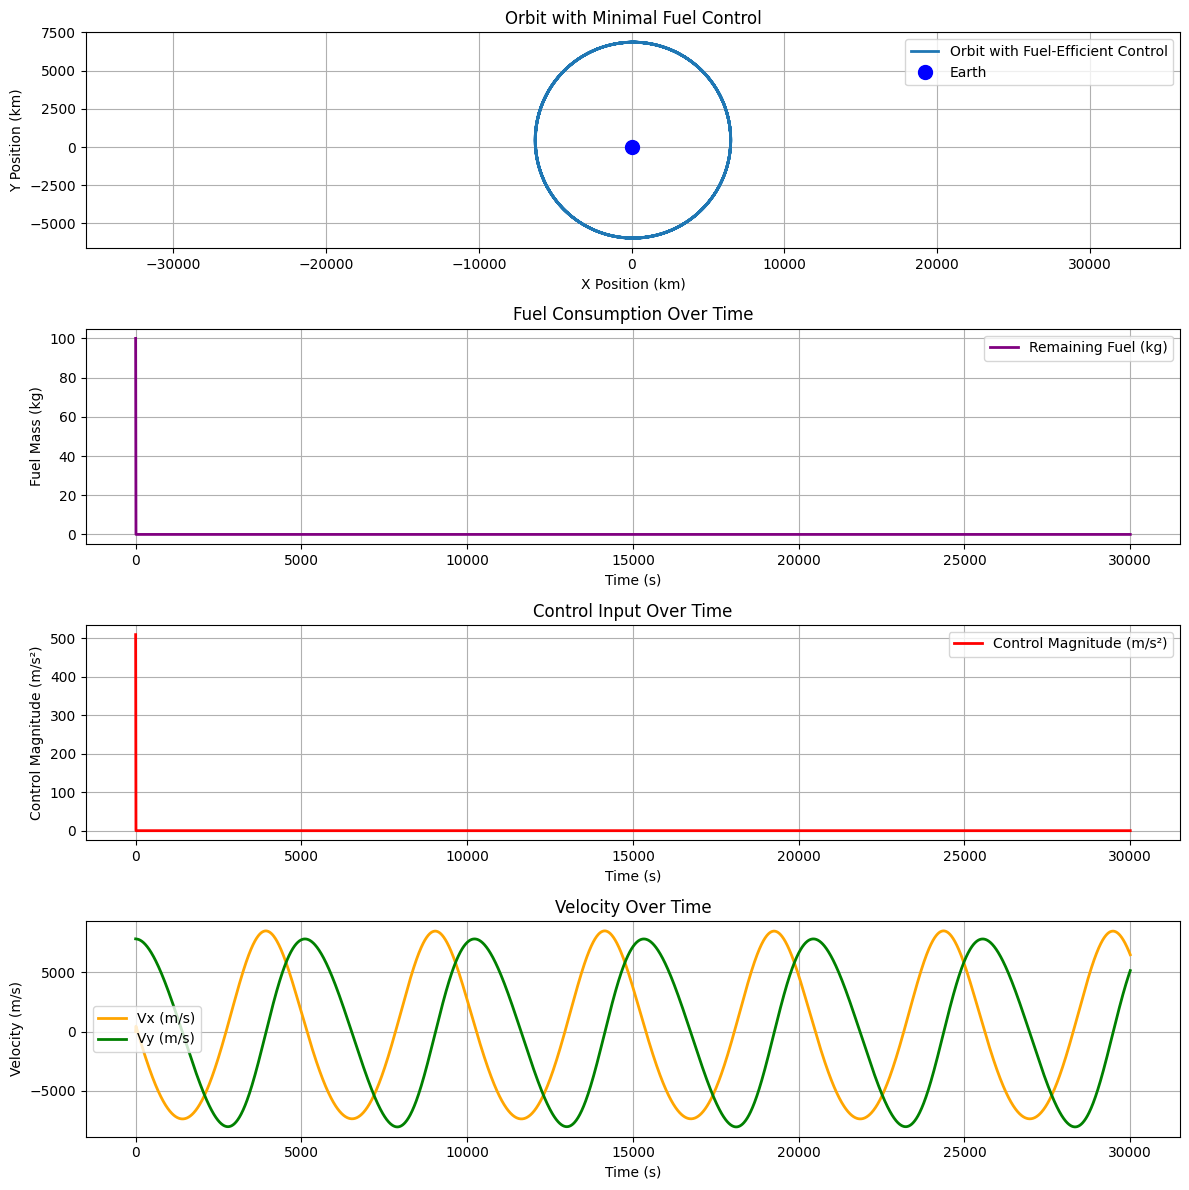

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 100     # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# Initial conditions
r0 = R + 100e3   # Initial altitude (200 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]

def control_input(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)

    # Target orbit parameters
    r_target = R + 200e3  # Target altitude (200 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Compute position and velocity error
    pos_error = r_target - r
    vel_error_x = vx_desired - vx
    vel_error_y = vy_desired - vy
    
    # PID-based minimal fuel control
    k_p = 0.05  # Position control gain
    k_v = 0.05   # Velocity control gain
    deadband = 0.1  # Threshold to stop fuel usage if error is small

    ux_position = k_p * pos_error * (x / r)
    uy_position = k_p * pos_error * (y / r)
    
    ux_velocity = k_v * vel_error_x
    uy_velocity = k_v * vel_error_y
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Total control input
    ux = ux_position + ux_velocity - ax_gravity
    uy = uy_position + uy_velocity - ay_gravity

    # Compute thrust force
    m_total = m_dry + mf
    thrust_x = m_total * ux
    thrust_y = m_total * uy
    thrust_magnitude = np.sqrt(thrust_x**2 + thrust_y**2)
    
    # Fuel efficiency control: If error is small, avoid burning fuel
    if np.abs(pos_error) < deadband and np.abs(vel_error_x) < deadband and np.abs(vel_error_y) < deadband:
        thrust_magnitude = 0  # Stop using fuel in deadband range

    # Fuel consumption (apply only if fuel is available)
    if thrust_magnitude > 0 and mf > 0:
        dm_dt = -thrust_magnitude / v_exhaust  # Fuel burn rate
    else:
        dm_dt = 0  # No fuel consumption if no thrust or no fuel left

    # If fuel is depleted, disable thrust
    if mf <= 0:
        ux, uy, dm_dt = 0, 0, 0

    return np.array([ux, uy, dm_dt])

def orbital_dynamics(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy, dm_dt = control_input(t, X)
    
    # Disturbance (random and periodic)
    periodic_disturbance = 50e-3 * np.array([np.sin(2 * np.pi * t / 10000), np.cos(2 * np.pi * t / 10000)])
    disturbance = periodic_disturbance
    
    # Total acceleration
    ax = ax_gravity + ux + disturbance[0]
    ay = ay_gravity + uy + disturbance[1]
    
    return [vx, vy, ax, ay, dm_dt]

# Solve the dynamics
T = 30000  # Simulation time in seconds
t_eval = np.linspace(0, T, 3000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time

# Plot results
plt.figure(figsize=(12, 12))

# 1. Orbit plot
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Fuel-Efficient Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimal Fuel Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. Fuel consumption plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3. Control input plot
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4. Velocity plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## 연료

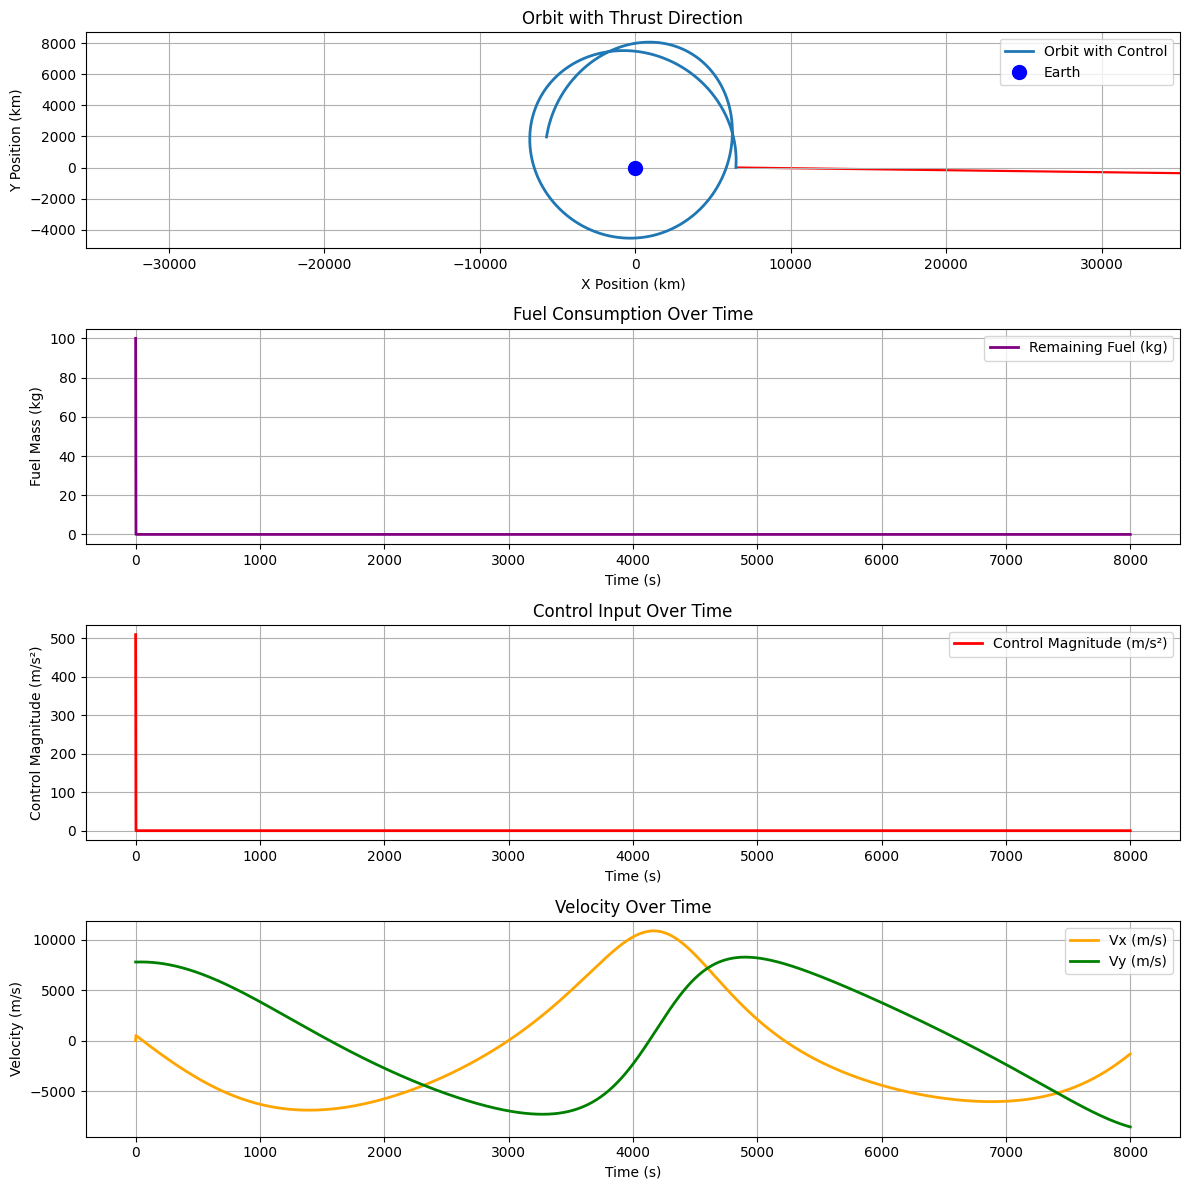

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 100     # Initial fuel mass (kg)
v_exhaust = 3000 # Exhaust velocity of the thruster (m/s)

# Initial conditions
r0 = R + 200e3   # Initial altitude (200 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]

def control_input(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)

    # Target orbit parameters
    r_target = R + 200e3  # Target altitude (200 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Compute position and velocity error
    pos_error = r_target - r
    vel_error_x = vx_desired - vx
    vel_error_y = vy_desired - vy
    
    # PID-based minimal fuel control
    k_p = 0.005  # Position control gain
    k_v = 0.05   # Velocity control gain
    deadband = 0.1  # Threshold to stop fuel usage if error is small

    ux_position = k_p * pos_error * (x / r)
    uy_position = k_p * pos_error * (y / r)
    
    ux_velocity = k_v * vel_error_x
    uy_velocity = k_v * vel_error_y
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # # Disturbance (random and periodic)
    # periodic_disturbance = 50e-4 * np.array([np.sin(2 * np.pi * t / 10000), np.cos(2 * np.pi * t / 10000)])
    # disturbance = periodic_disturbance
    
    # Total acceleration
    ux = ax_gravity + ux_velocity #+ disturbance[0]
    uy = ay_gravity + uy_velocity #+ disturbance[1]
    
    return np.array([ux, uy])

def orbital_dynamics(t, X):
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay, -np.linalg.norm([ux, uy]) / v_exhaust]

# Solve the dynamics
T = 8000  # Simulation time in seconds
t_eval = np.linspace(0, T, 3000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, method="DOP853", rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])

# Plot results
plt.figure(figsize=(12, 12))

# 1. Orbit plot with thrust direction
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.quiver(x[::100] / 1e3, y[::100] / 1e3, control_inputs[::100, 0], control_inputs[::100, 1], 
           color='red', angles='xy', scale_units='xy', scale=5e-3, width=0.002, headwidth=4)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Thrust Direction")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. Fuel consumption plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3. Control input plot
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4. Velocity plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

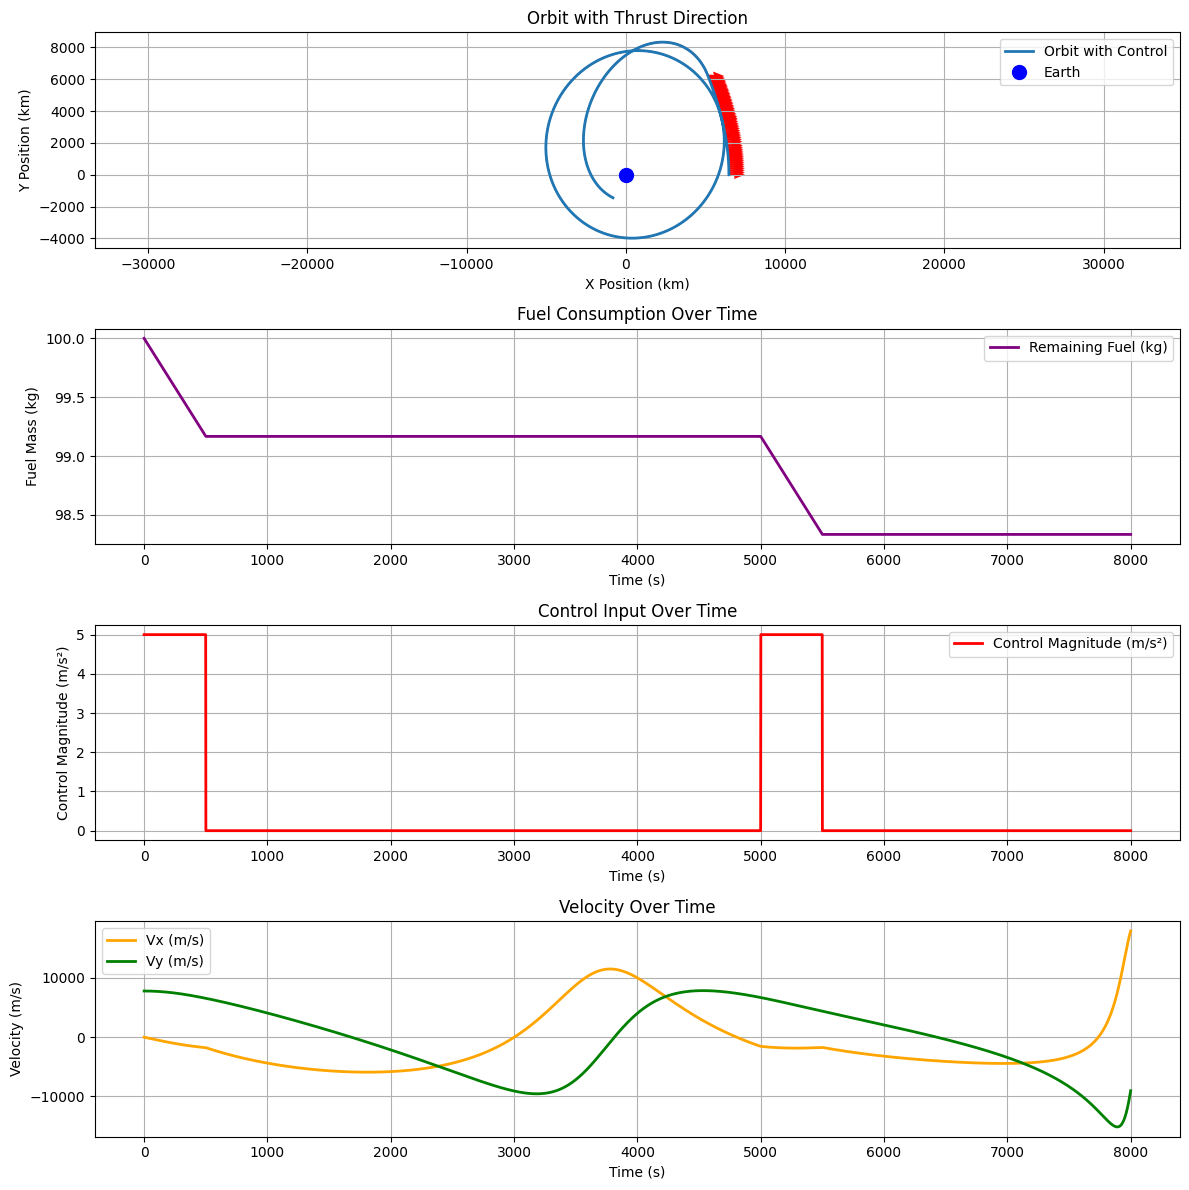

In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 🌍 Physical Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# 🚀 Satellite Parameters
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 100     # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# 🌌 Initial Conditions
r0 = R + 100e3   # Initial orbit (200 km altitude)
v0 = 7.8e3       # Initial velocity (approximate circular orbit velocity)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]

v_max = 10e3  # Maximum allowed velocity (m/s)


def control_input(t, X):
    """ Compute optimal control acceleration for fuel-efficient orbit transfer using impulsive burns. """
    x, y, vx, vy, mf = X[:5]
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)  # Current speed

    # Define target orbit parameters
    r_target = R + 400e3  # Target altitude (400 km)
    v_circular = np.sqrt(G * M / r_target)

    # Determine required velocity change (delta_v) for Hohmann Transfer
    if t < 500:  # 1st Burn (Initial transfer)
        v_transfer = np.sqrt(G * M * (2 / r - 1 / r_target))  # Elliptical orbit velocity
        delta_v = v_transfer - v  # Required velocity change
    elif 5000 < t < 5500:  # 2nd Burn (Circularization at the target orbit)
        delta_v = v_circular - v
    else:
        delta_v = 0  # No thrust applied outside burn phases

    # Implement Bang-Bang Control (Full thrust or No thrust)
    thrust_magnitude = np.sign(delta_v) * np.min([np.abs(delta_v), 5])  # Max thrust of 5 m/s²

    # Compute fuel consumption
    dm_dt = -thrust_magnitude / v_exhaust if thrust_magnitude > 0 and mf > 0 else 0

    # If fuel is depleted, disable thrust
    if mf <= 0:
        thrust_magnitude = 0
        dm_dt = 0

    return np.array([thrust_magnitude, 0, dm_dt])  # Apply thrust only in the x-direction


def orbital_dynamics(t, X):
    """ Compute orbital dynamics including gravitational, control, and disturbance forces. """
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # 🌍 Compute gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # 🚀 Get control input (optimized thrust for fuel-efficient transfer)
    ux, uy, dm_dt = control_input(t, X)

    # 🌪 Simulate environmental disturbances
    disturbance_scale = 1e-3  # Scale of disturbances
    disturbance = disturbance_scale * np.array([
        np.sin(2 * np.pi * t / 500),  # Adjust frequency
        np.cos(2 * np.pi * t / 500)
    ])

    # 💡 Compute total acceleration (gravity + control + disturbances)
    ax = ax_gravity + ux + disturbance[0]
    ay = ay_gravity + uy + disturbance[1]
    
    return [vx, vy, ax, ay, dm_dt]


# 🔄 Solve the orbital dynamics over time
T = 8000  # Total simulation duration in seconds
t_eval = np.linspace(0, T, 5000)  # Time points for evaluation
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, method="DOP853", rtol=1e-8, atol=1e-8)

# Extract simulation results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])


# 📊 Plot results
plt.figure(figsize=(12, 12))

# 1️⃣ Orbit Plot with Thrust Directions
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.quiver(x[::10] / 1e3, y[::10] / 1e3, control_inputs[::10, 0], control_inputs[::10, 1], 
           color='red', angles='xy', scale_units='xy', scale=5e-3, width=0.002, headwidth=4)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Thrust Direction")
plt.legend()
plt.axis('equal')
plt.grid()

# 2️⃣ Fuel Consumption Plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3️⃣ Control Input Magnitude Plot
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4️⃣ Velocity Plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

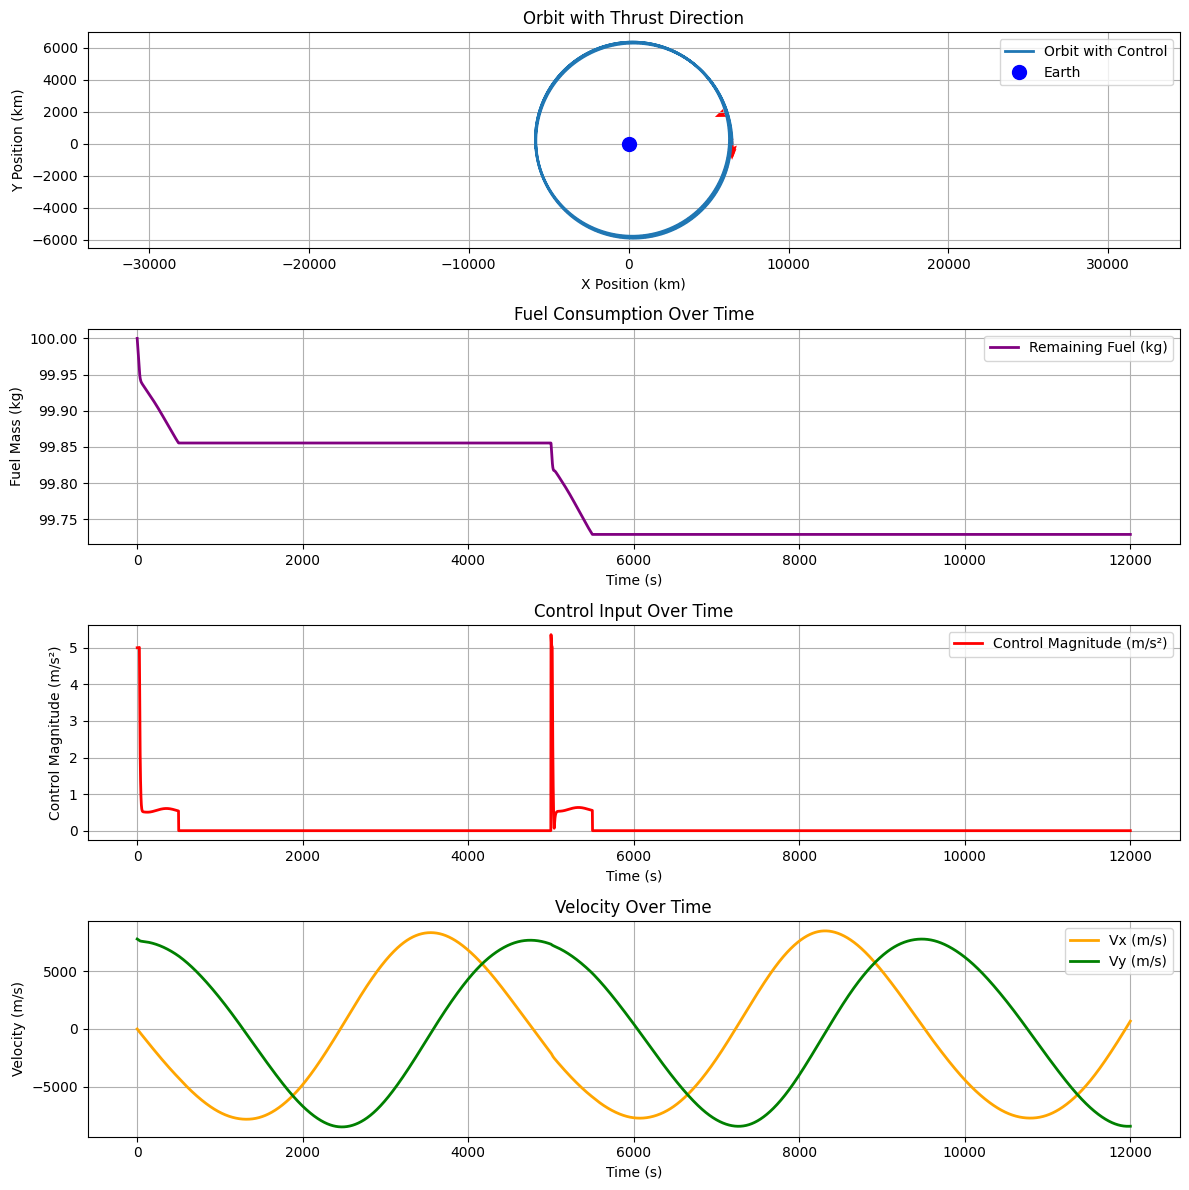

In [66]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 🌍 Physical Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# 🚀 Satellite Parameters
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 100     # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# 🌌 Initial Conditions
r0 = R + 100e3   # Initial orbit (100 km altitude)
v0 = 7.8e3       # Initial velocity (approximate circular orbit velocity)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# 🌍 Target Orbit
r_target = R + 500e3  # Target altitude (400 km)
v_circular = np.sqrt(G * M / r_target)  # Required circular orbit velocity

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]


def control_input(t, X):
    """ Compute optimal control acceleration to achieve target orbit with minimal fuel. """
    x, y, vx, vy, mf = X[:5]
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)  # Current speed

    # Compute radial and tangential velocity components
    vr = (x * vx + y * vy) / r  # Radial velocity
    vt = (x * vy - y * vx) / r  # Tangential velocity

    # Compute target velocity components
    vr_target = 0  # Circular orbit requires radial velocity = 0
    vt_target = v_circular  # Circular orbit requires correct tangential velocity

    # Error terms
    altitude_error = r_target - r
    velocity_error = vt_target - vt
    radial_error = vr_target - vr

    # Determine if thrust is required (Only burn at key moments)
    if (t < 500 or (5000 < t < 5500)) and np.abs(altitude_error) > 1e2:
        # Compute required delta-v using a proportional control strategy
        delta_vt = velocity_error * 0.1
        delta_vr = radial_error * 0.1
    else:
        delta_vt = 0
        delta_vr = 0

    # Compute thrust magnitude (Bang-Bang Control for fuel efficiency)
    thrust_t = np.sign(delta_vt) * np.min([np.abs(delta_vt), 5])  # Max 5 m/s²
    thrust_r = np.sign(delta_vr) * np.min([np.abs(delta_vr), 5])  # Max 5 m/s²

    # Convert thrust to x, y components
    ux = (thrust_t * (-y / r)) + (thrust_r * (x / r))
    uy = (thrust_t * (x / r)) + (thrust_r * (y / r))

    # Compute fuel consumption
    dm_dt = -np.sqrt(ux**2 + uy**2) / v_exhaust if mf > 0 else 0

    # If fuel is depleted, disable thrust
    if mf <= 0:
        ux, uy, dm_dt = 0, 0, 0

    return np.array([ux, uy, dm_dt])


def orbital_dynamics(t, X):
    """ Compute orbital dynamics including gravitational, control, and disturbance forces. """
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # 🌍 Compute gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # 🚀 Get control input
    ux, uy, dm_dt = control_input(t, X)

    # 🌪 Simulate environmental disturbances
    disturbance_scale = 50e-3  # Scale of disturbances
    disturbance = disturbance_scale * np.array([
        np.sin(2 * np.pi * t / 500),  # Adjust frequency
        np.cos(2 * np.pi * t / 500)
    ])

    # 💡 Compute total acceleration (gravity + control + disturbances)
    ax = ax_gravity + ux + disturbance[0]
    ay = ay_gravity + uy + disturbance[1]
    
    return [vx, vy, ax, ay, dm_dt]


# 🔄 Solve the orbital dynamics over time
T = 12000  # Total simulation duration in seconds
t_eval = np.linspace(0, T, 5000)  # Time points for evaluation
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, method="DOP853", rtol=1e-8, atol=1e-8)

# Extract simulation results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])


# 📊 Plot results
plt.figure(figsize=(12, 12))

# 1️⃣ Orbit Plot with Thrust Directions
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.quiver(x[::10] / 1e3, y[::10] / 1e3, control_inputs[::10, 0], control_inputs[::10, 1], 
           color='red', angles='xy', scale_units='xy', scale=5e-3, width=0.002, headwidth=4)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Thrust Direction")
plt.legend()
plt.axis('equal')
plt.grid()

# 2️⃣ Fuel Consumption Plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3️⃣ Control Input Magnitude Plot
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4️⃣ Velocity Plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


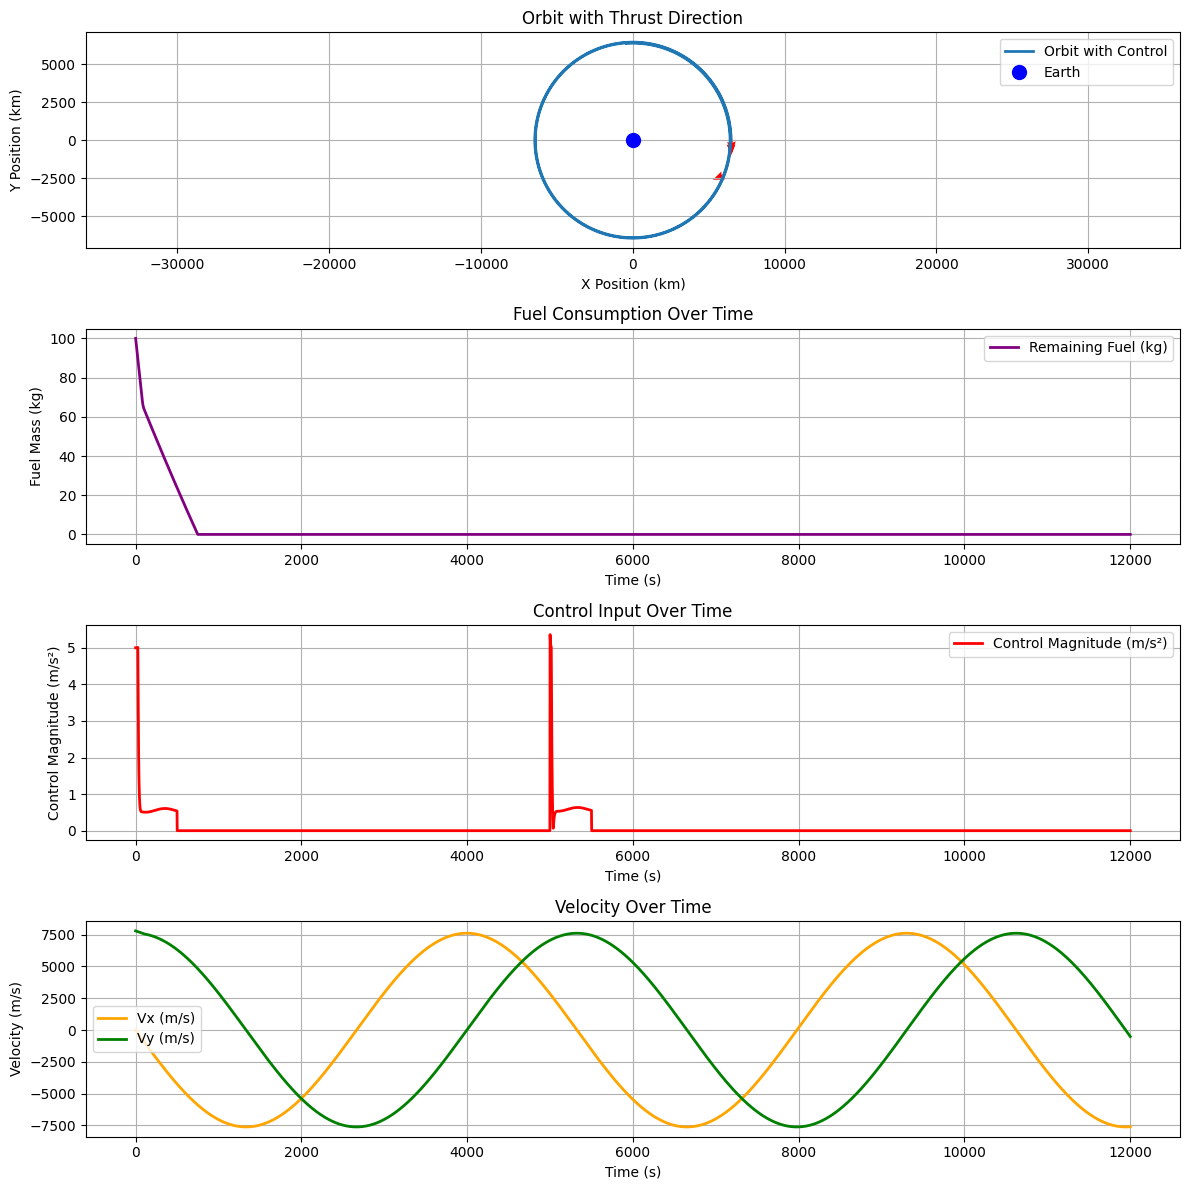

In [79]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 🌍 Physical Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# 🚀 Satellite Parameters
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 100     # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# 🌌 Initial Conditions
r0 = R + 100e3   # Initial orbit (100 km altitude)
v0 = 7.8e3       # Initial velocity (approximate circular orbit velocity)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# 🌍 Target Orbit
r_target = R + 500e3  # Target altitude (500 km)
v_circular = np.sqrt(G * M / r_target)  # Required circular orbit velocity

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]


def compute_fuel_consumption(ux, uy, mf):
    """ Compute fuel consumption based on applied thrust. 
        Stops control when fuel runs out.
    """
    # Compute total thrust magnitude
    thrust_magnitude = np.sqrt(ux**2 + uy**2) * (m_dry + mf)

    # Compute fuel burn rate (mass flow rate)
    dm_dt = -thrust_magnitude / v_exhaust if mf > 0 else 0

    # Prevent fuel from going negative
    if mf + dm_dt * 0.1 < 0:  # Assume small time step to check final fuel
        dm_dt = -mf  # Use remaining fuel exactly

    # Stop control when fuel is depleted
    if mf <= 0:
        return 0, 0, 0  # No thrust, no fuel consumption

    return ux, uy, dm_dt


def control_input(t, X):
    """ Compute optimal control acceleration for minimum fuel consumption and stop control when fuel runs out. """
    x, y, vx, vy, mf = X[:5]

    # If fuel is depleted, disable control completely
    if mf <= 0:
        return np.array([0, 0, 0])

    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)  # Current speed

    # Compute radial and tangential velocity components
    vr = (x * vx + y * vy) / r  # Radial velocity
    vt = (x * vy - y * vx) / r  # Tangential velocity

    # Compute target velocity components
    vr_target = 0  # Circular orbit requires radial velocity = 0
    vt_target = v_circular  # Circular orbit requires correct tangential velocity

    # Error terms
    altitude_error = r_target - r
    velocity_error = vt_target - vt
    radial_error = vr_target - vr

    # Determine if thrust is required (Only burn when necessary)
    altitude_tolerance = 500  # meters
    velocity_tolerance = 5  # m/s
    if np.abs(altitude_error) > altitude_tolerance or np.abs(velocity_error) > velocity_tolerance:
        # Apply minimal thrust to correct velocity in an optimal way
        delta_vt = velocity_error * 0.1  # Reduce thrust intensity
        delta_vr = radial_error * 0.1  # Reduce radial thrust intensity
    else:
        delta_vt = 0
        delta_vr = 0  # Stop thrusting if within tolerance range

    # Compute thrust magnitude (Bang-Bang Control for fuel efficiency)
    thrust_t = np.sign(delta_vt) * np.min([np.abs(delta_vt), 2])  # Limit to 2 m/s² for efficiency
    thrust_r = np.sign(delta_vr) * np.min([np.abs(delta_vr), 2])  # Limit to 2 m/s²

    # Convert thrust to x, y components
    ux = (thrust_t * (-y / r)) + (thrust_r * (x / r))
    uy = (thrust_t * (x / r)) + (thrust_r * (y / r))

    return compute_fuel_consumption(ux, uy, mf)


def orbital_dynamics(t, X):
    """ Compute orbital dynamics including gravitational and control forces. Control stops when fuel runs out. """
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # 🌍 Compute gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # 🚀 Get control input (only if fuel remains)
    if mf > 0:
        ux, uy, dm_dt = control_input(t, X)
    else:
        ux, uy, dm_dt = 0, 0, 0  # Stop control if fuel is depleted

    # 💡 Compute total acceleration (gravity + control)
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay, dm_dt]


# 🔄 Solve the orbital dynamics over time
T = 12000  # Total simulation duration in seconds
t_eval = np.linspace(0, T, 5000)  # Time points for evaluation
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, method="DOP853", rtol=1e-8, atol=1e-8)

# Extract simulation results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time


# 📊 Plot results
plt.figure(figsize=(12, 12))

# 1️⃣ Orbit Plot with Thrust Directions
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.quiver(x[::10] / 1e3, y[::10] / 1e3, control_inputs[::10, 0], control_inputs[::10, 1], 
           color='red', angles='xy', scale_units='xy', scale=5e-3, width=0.002, headwidth=4)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Thrust Direction")
plt.legend()
plt.axis('equal')
plt.grid()

# 2️⃣ Fuel Consumption Plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3️⃣ Control Input Magnitude Plot
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4️⃣ Velocity Plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 🌍 Physical Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# 🚀 Satellite Parameters
m_dry = 500      # Dry mass of the satellite (kg)
m_fuel = 1000    # Initial fuel mass (kg)
v_exhaust = 3000  # Exhaust velocity of the thruster (m/s)

# 🌌 Initial Conditions
r0 = R + 200e3   # Initial orbit (200 km altitude)
v0 = 7.8e3       # Initial velocity (approximate circular orbit velocity)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)
mf0 = m_fuel     # Initial fuel mass

# 🌍 Target Orbit
r_target = R + 500e3  # Target altitude (500 km)
v_circular = np.sqrt(G * M / r_target)  # Required circular orbit velocity

# State vector: [x, y, vx, vy, mf]
X0 = [x0, y0, vx0, vy0, mf0]

# 🚀 Control Parameters
altitude_tolerance = 500  # meters
velocity_tolerance = 5  # m/s
thrust_limit = 1.5  # Limit thrust to 1.5 m/s² for efficiency


def compute_fuel_consumption(ux, uy, mf):
    """ Compute fuel consumption based on applied thrust. Stops control when fuel runs out. """
    thrust_magnitude = np.sqrt(ux**2 + uy**2) * (m_dry + mf)
    dm_dt = -thrust_magnitude / v_exhaust if mf > 0 else 0

    # Prevent negative fuel
    if mf + dm_dt * 0.1 < 0:
        dm_dt = -mf  # Use remaining fuel exactly

    # Stop control when fuel is depleted
    if mf <= 0:
        return 0, 0, 0

    return ux, uy, dm_dt


def control_input(t, X):
    """ Compute optimal control acceleration for minimum fuel consumption and stop control when fuel runs out. """
    x, y, vx, vy, mf = X[:5]

    # If fuel is depleted, disable control completely
    if mf <= 0:
        return np.array([0, 0, 0])

    r = np.sqrt(x**2 + y**2)

    # Compute desired velocity for stable orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)

    # Compute position and velocity error
    pos_error = r_target - r
    vel_error_x = vx_desired - vx
    vel_error_y = vy_desired - vy

    # Determine if thrust is required (Only burn when necessary)
    if np.abs(pos_error) > altitude_tolerance or np.abs(vel_error_x) > velocity_tolerance or np.abs(vel_error_y) > velocity_tolerance:
        # Apply proportional control for minimal thrust
        delta_vt = vel_error_x * 0.05  # Reduce thrust intensity
        delta_vr = vel_error_y * 0.05  # Reduce radial thrust intensity
    else:
        delta_vt = 0
        delta_vr = 0  # Stop thrusting if within tolerance range

    # Compute thrust magnitude (Bang-Bang Control for fuel efficiency)
    thrust_t = np.sign(delta_vt) * np.min([np.abs(delta_vt), thrust_limit])
    thrust_r = np.sign(delta_vr) * np.min([np.abs(delta_vr), thrust_limit])

    # Convert thrust to x, y components
    ux = (thrust_t * (-y / r)) + (thrust_r * (x / r))
    uy = (thrust_t * (x / r)) + (thrust_r * (y / r))

    return compute_fuel_consumption(ux, uy, mf)


def orbital_dynamics(t, X):
    """ Compute orbital dynamics including gravitational and control forces. Control stops when fuel runs out. """
    x, y, vx, vy, mf = X
    r = np.sqrt(x**2 + y**2)
    
    # 🌍 Compute gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # 🚀 Get control input (only if fuel remains)
    if mf > 0:
        ux, uy, dm_dt = control_input(t, X)
    else:
        ux, uy, dm_dt = 0, 0, 0  # Stop control if fuel is depleted

    # 💡 Compute total acceleration (gravity + control)
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay, dm_dt]


# 🔄 Solve the orbital dynamics over time
T = 8000  # Total simulation duration in seconds
t_eval = np.linspace(0, T, 3000)  # Time points for evaluation
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, method="DOP853", rtol=1e-8, atol=1e-8)

# Extract simulation results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
mf_values = sol.y[4]  # Fuel mass over time


# 📊 Plot results
plt.figure(figsize=(12, 12))

# 1️⃣ Orbit Plot with Thrust Directions
plt.subplot(4, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.quiver(x[::10] / 1e3, y[::10] / 1e3, control_inputs[::10, 0], control_inputs[::10, 1], 
           color='red', angles='xy', scale_units='xy', scale=5e-3, width=0.002, headwidth=4)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Thrust Direction")
plt.legend()
plt.axis('equal')
plt.grid()

# 2️⃣ Fuel Consumption Plot
plt.subplot(4, 1, 2)
plt.plot(sol.t, mf_values, label="Remaining Fuel (kg)", color="purple", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fuel Mass (kg)")
plt.title("Fuel Consumption Over Time")
plt.legend()
plt.grid()

# 3️⃣ Control Input Magnitude Plot
control_magnitudes = np.linalg.norm(control_inputs[:, :2], axis=1)  # Compute control magnitude

plt.subplot(4, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

# 4️⃣ Velocity Plot
plt.subplot(4, 1, 4)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()